# Topic

Employee Turnover Classiifcation Using Machine Learning Algorithms (Logisitc Regression, Random Forest, Support Vector Machine, Naive Bayes, KNN) 

# Introduction

Employee turnover refers to the percentage of workers who leave an organization and are replaced by new employees

In this project, we’ll work on HR data to build a classifier that helps us predict what kind of employees will be more likely to leave given some attributes. 

Such classifier would help an organization predict employee turnover and be pro-active in helping to solve such costly matter.

# Data Preprocessing

The dataset is about information regarding employes in a company like salary, Department, work-time, promotions, satisfaction level, promotion status and few other info

Each Row represents a employe
Each Column represents employe's attributes/features

In [1]:
#importing pandas package for reading data 
import pandas as pd
Dataset = pd.read_csv("HR.csv")

#adding all column names to a list
column_names = Dataset.columns.tolist()

#Printing all column names of dataset
print("Column names:")
print(column_names)

#Printing some sample entries of dataset
print("\nFirst Five Entries From Data ")
Dataset.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

First Five Entries From Data 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


We relocate the left attribute of the dataset to the last column for easy class label extraction for the ease of working of our algorithms

In [2]:
cols = list(Dataset.columns.values) #Make a list of all of the columns in the Dataset
cols.pop(cols.index('left')) #Remove left from list
Dataset = Dataset[cols+['left']]

In [3]:
#Renaming sales heading as Department to avoid confusion
Dataset = Dataset.rename(columns={"sales": "department"})

In [4]:
#Printing first five entries of data after modifying sales column name
Dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [5]:
#Printing datatype of each column
Dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [6]:
#Checking data, if there is any missing value 
Dataset.isnull() .any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
department               False
salary                   False
left                     False
dtype: bool

As everything is showing false, so our dataset is pretty clean

In [7]:
#Printing size of dataset
Dataset.shape

(14999, 10)

This represents that there are 14999 employes and 10 features

In [8]:
#Printing all categories in department
Dataset['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

The Department column has many categories and we need to reduce the categories for a better modeling

Let us combine “technical”, “support” and “IT” together and call them “technical”.

In [9]:
#importing numpy package to perform operation on arrays
import numpy as np

Dataset['department']=np.where(Dataset['department']=='support','technical',Dataset['department'])
Dataset['department']=np.where(Dataset['department']=='IT','technical',Dataset['department'])

#Printing all categories of department after the change
Dataset['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

# Data Exploration

Let's see how many employes left the company and how many remained

In [10]:
Dataset['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

0 represents employes remained

1 represents employes left

So, 3571 employes left company and 11428 employed remained

Getting some observations of numbers across these two classes 

In [11]:
Dataset.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Observations:

The average satisfaction level of employees who stayed with the company is higher than that of the employees who left

The average monthly work hours of employees who left the company is more than that of the employees who stayed

The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents

The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years

We have got some observations in category of employes who left and who remained

Now, We can calculate categorical means for categorical variables such as department and salary 

to get a more detailed sense of our data

In [12]:
#Calculating mean of Department category 

In [13]:
Dataset.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307,0.153748
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253,0.265971
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298,0.290934
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524,0.144444
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117,0.236597
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000,0.219512
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155,0.244928
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.008258,0.246924


In [14]:
#Calculating mean of Salary category 

In [15]:
Dataset.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.058205,0.066289
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.009021,0.296884
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.028079,0.204313


# Data Visualization

In [16]:
#importing matplotlib package for plotting graphs
import matplotlib.pyplot as plt

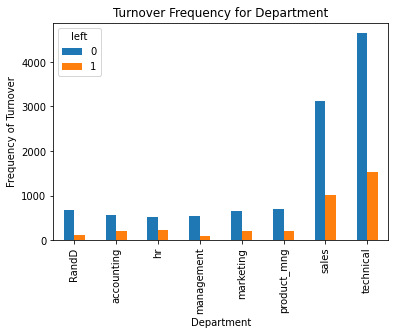

In [17]:
pd.crosstab(Dataset.department,Dataset.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

It is clear that the frequency of employee turnover depends on the department they work for.

Thus, department can be a good predictor of the outcome variable

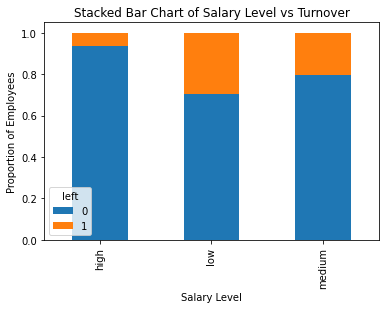

In [18]:
table = pd.crosstab(Dataset.salary, Dataset.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level;

hence, salary level can be a good predictor of the outcome variable.

Visualizing using Seaborn Library

In [19]:
#importing seaborn library for some attractive and informative graphs 
import seaborn as sns

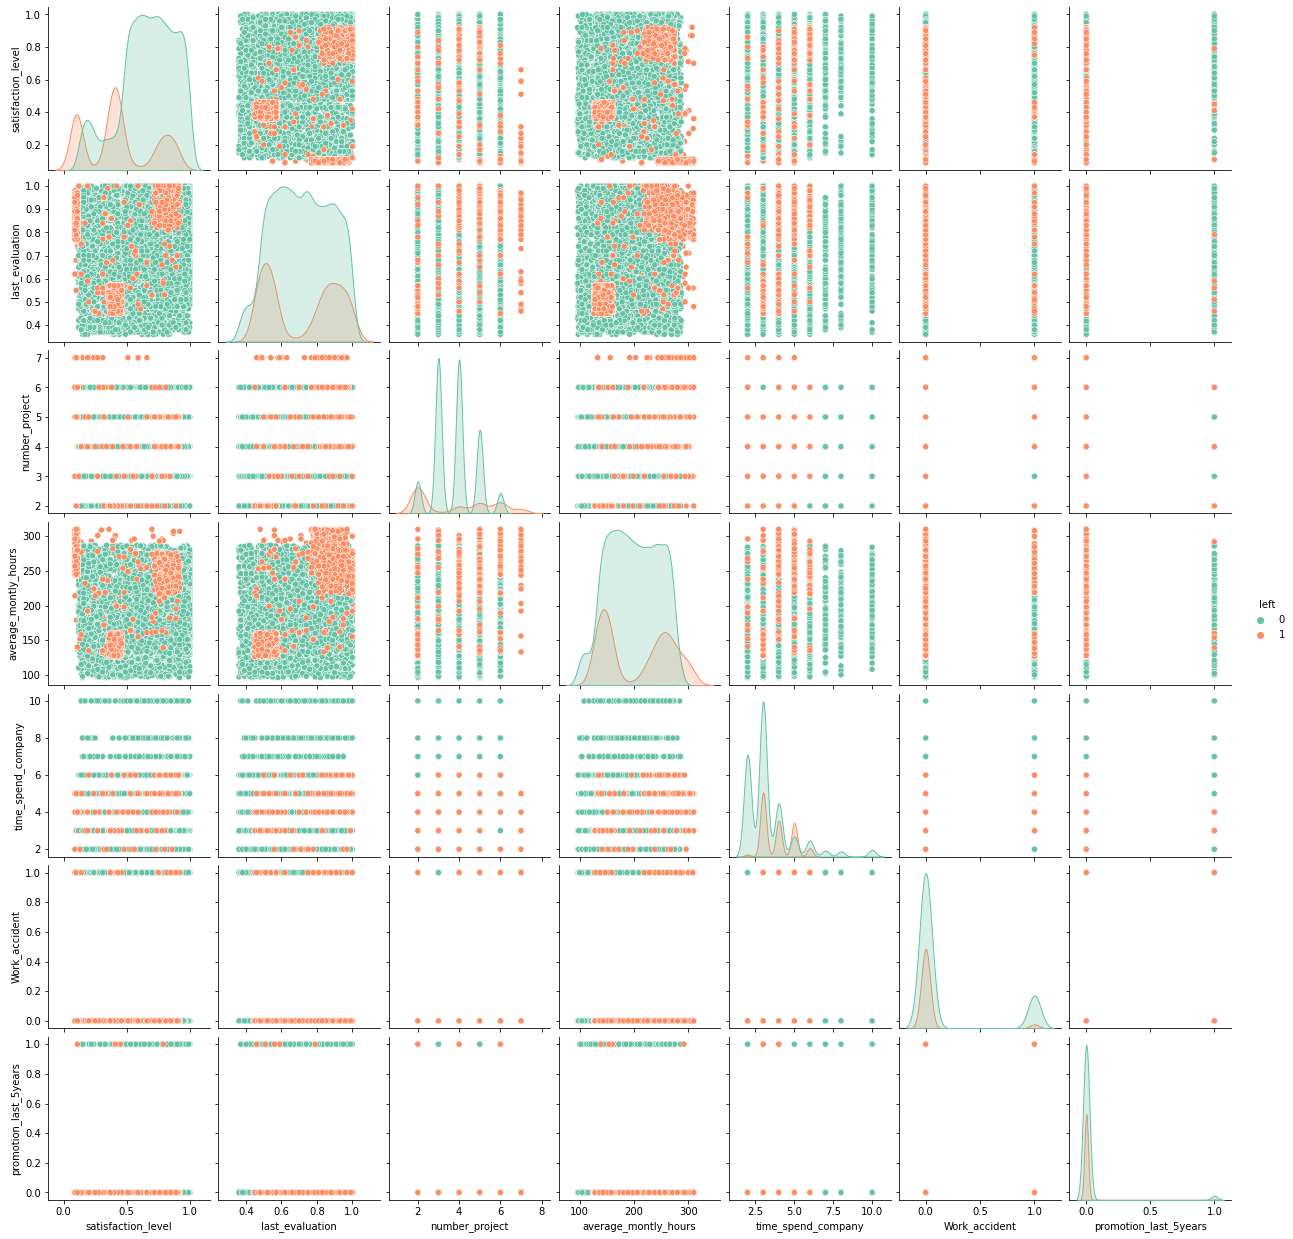

In [20]:
sns.pairplot(data=Dataset,hue="left",palette="Set2")

Histograms are one of the most helpful tools we can use for numeric variables during the exploratory phrase

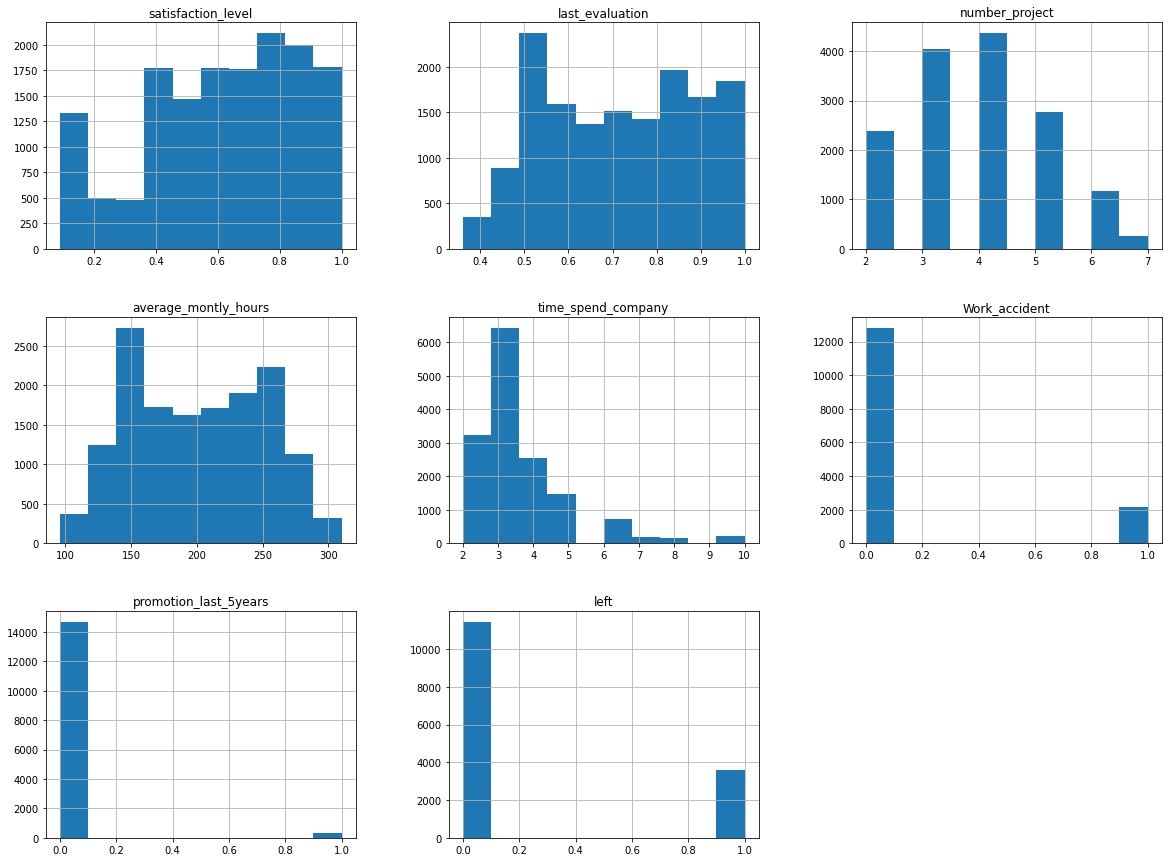

In [21]:
num_bins = 10
Dataset.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

Creating Dummy Variables for Categorical variables 

In [22]:
#There are 2 caategorical variables department & salary
#These variables can be converted to dummy variables before using
cat_vars=['department','salary']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(Dataset[var], prefix=var)
    hr1=Dataset.join(cat_list)
    Dataset=hr1

The actual categorical variable needs to be removed once the dummy variables have been created

Column names after creating dummy variables for categorical variables:

The outcome variable is “left”, and all the other variables are predictors

In [23]:
Dataset.drop(Dataset.columns[[7, 8]], axis=1, inplace=True)
Attributes=Dataset.columns.values
print(Attributes)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident'
 'promotion_last_5years' 'left' 'department_RandD' 'department_accounting'
 'department_hr' 'department_management' 'department_marketing'
 'department_product_mng' 'department_sales' 'department_technical'
 'salary_high' 'salary_low' 'salary_medium']


In [24]:
Dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [25]:
cols = list(Dataset.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('left')) #Remove left from list
Dataset = Dataset[cols+['left']]

In [26]:
Dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [27]:
Class_label_index=Dataset.columns.get_loc("left")
print(Class_label_index)

18


In [28]:
#A function to convert dataframe into a list form 
def DataFrameToList(dataset):
    #getting the samples(row) and attributes(column)
    [row, col] = dataset.shape
    #iterating until col-1(excluding the class labels )
    colu = list(dataset.columns.values)
    for i in range(1,len(colu)):
        #changing the samples from string to float
        dataset[colu[i]] = pd.to_numeric(dataset[colu[i]], downcast="float")
    #changing the datatype to list
    dataset = dataset.values.tolist()
    return dataset

In [29]:
#calling function to convert to list
Dataset=DataFrameToList(Dataset)
Dataset

[[0.38,
  0.5299999713897705,
  2.0,
  157.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0],
 [0.8,
  0.8600000143051147,
  5.0,
  262.0,
  6.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [0.11,
  0.8799999952316284,
  7.0,
  272.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [0.72,
  0.8700000047683716,
  5.0,
  223.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0],
 [0.37,
  0.5199999809265137,
  2.0,
  159.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0],
 [0.41,
  0.5,
  2.0,
  153.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0],
 [0.1,
  0.7699999809265137,
  6.0,
  247.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

In [30]:
Y = [ Dataset[i][Class_label_index] for i in range(len(Dataset)) ]

In [31]:
Y

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

Splitting Training and Testing Data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(Dataset, Y, test_size = 0.2, random_state=0)

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

# EVALUATION METRICS

Accuracy is the proportion of correct classifications ( true positives and negatives ) from overall number of cases

Precision is the proportion of correct positive classifications ( true positives ) from classes that are predicted as positive

Sensitivity(Recall) corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.

Specificity corresponds to the proportion of negative data points that are correctly considered as negative, with respect to all negative data points.

F1 Score is used to measure a test’s accuracy.It is the Harmonic Mean between precision and recall. The range for F1 Score is between 0 to 1. It tells you how precise your classifier is, as well as how robust it is.

![image.png](attachment:image.png)

The Positive/Negative label refers to the predicted outcome of an experiment, while the True/False refers to the actual outcome. 

# THE ROC CURVE

ROC(Reciever Operating Characteristics) is a probability curve and AUC(Area under curve) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

![image.png](attachment:image.png)

An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability.

# UNDERSTANDING LOGISTIC REGRESSION

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

![image.png](attachment:image.png)

In linear regression we have,
Y(predicted) = (β1*x + βo) + Error value
Where ‘β1’ is the slope and ‘βo’ is the y-intercept similar to the equation of a line. The values ‘β1’ and ‘βo’ must be chosen so that they minimize the error. To check the error we have to calculate the sum of squared error and tune the parameters to try to reduce the error.

![image.png](attachment:image.png)

Similarly, in logistic regression, we use sigmoid function.In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

Z = β₀ + β₁X

hΘ(x) = sigmoid(Z)

i.e. hΘ(x) = 1/(1 + e^-(β₀ + β₁X)

![image.png](attachment:image.png)

# K-Nearest Neighbour Code(from Scratch)

KNN can be used for both classification and regression predictive problems.
K-NN algorithm assumes the similarity between the new data and available data and put the new data into the category that is most similar to the available categories.

###### Where do we use KNN Algorithm...?

Suppose there are two categories, i.e., Category A and Category B, and we have a new data point \'p\', so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm

###### How KNN works...?

KNN basically a Supervised Machine Learning Algorithm. It uses Supervised data wich data has complete labelling of all features. so we need not to further classify the data just to train our model with the data we have.

![image.png](attachment:image.png)

Steps for KNN Algorithm:

1) Calculate Manhattan Distance

2) Get Nearest Neighbors

3) Make Predictions

Step 1: Calculate Manhattan Distance

In [34]:
# Calculate the Manhattan distance between two datapoints
def manhattan_distance(row1, row2):
    distance = 0.0 #initialising distance to 0 
    for i in range(len(row1)-1): #for each feature
        distance += abs(row1[i] - row2[i]) #calculate distance between train feature and test feature
        #since the class-label is in first row loop is from 1,len(row) and for test-data we will have to consider i-1th element
    return distance

Step 2: Get nearest neighbors

In [35]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list() #empty list
    for train_row in train: #each sample in dataset
        dist = manhattan_distance(test_row, train_row) #pass each row to function 
        distances.append((train_row, dist)) 
        #appends the training set row along with the distance between training and test data
    #sorts the list according to the distance value
    distances.sort(key=lambda tup: tup[1])
    neighbors = list() #initialising empty neighbours list
    for i in range(num_neighbors):
        #appending the first 'num_neighbours' number of train rows
        #since minimum distance will appear first in sorted list
        neighbors.append(distances[i][0])
    return neighbors

Step 3: Make Predictions

In [36]:
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    #calls the function to get neighbours
    neighbors = get_neighbors(train, test_row, num_neighbors)
    #takes out the last column from each row for class
    output_values = [row[-1] for row in neighbors]
    #checks the maximum occurence and sets that as final prediction
    prediction = max(set(output_values), key=output_values.count)
    return prediction

Testing the KNN Algorithm Code using the Testing Dataset

In [37]:
num_neighbors = 5
y_pred=[]
for row in X_test:
    y_pred.append(predict_classification(X_train, row, num_neighbors))

Evaluating KNN Algorithm

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("f1-score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9443333333333334
Precision: 0.849476439790576
Recall: 0.9258202567760342
f1-score: 0.8860068259385665


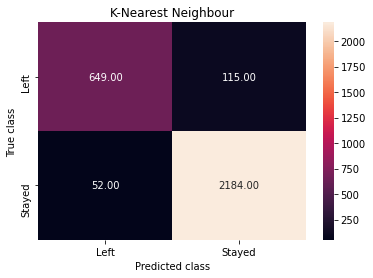

In [40]:
svc_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('K-Nearest Neighbour')
plt.savefig('K-Nearest Neighbour')

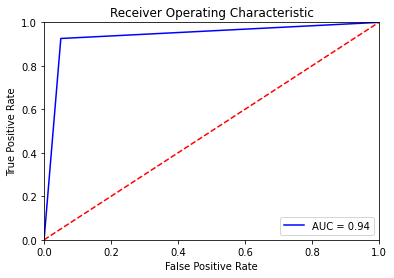

In [41]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes Classifier Code(from Scratch)

Naive Bayes is a probabilistic machine learning model which is used as a classifier. It comes under Supervised learning algorithms.

The intuition behind this algorithm is Bayes theorem. Bayes theorem tells the probability of an event occurring given the probability of another event that has been already occurred

They are "naive" because they assume that each of your characteristics are independent from one another.

Steps for Naive Bayes Classification:

1) Separate By Class

2) Summarize Dataset

3) Summarize Data By Class

4) Gaussian Probability Density Function

5) Class Probabilities

Step 1: Separate By Class

In [ ]:
# Split the dataset by class labels so as to calculate the the probability of each datapoint by the class they belong to, 
def separate_by_class(dataset):
    # This dictionary is created where each key is the class value and then add a list of all the datapoints as the value 
    # in the dictionary 
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

Step 2: Summarize Dataset

![Mean-Formula.jpg](attachment:Mean-Formula.jpg)

![image.png](attachment:image.png)

In [ ]:
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [ ]:
from math import sqrt
from math import pi
from math import exp
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

In [ ]:
# Calculate the mean, stdev and count for each feature in a dataset
# here count means the number of datapoints that belong to a certain class
def summarize_dataset(dataset):
    #extracting the number of datapoints and features
    rows, cols = (len(dataset),len(dataset[0]))
    arr=[] 
    for i in range(rows): 
        col = [] 
        for j in range(cols-1):
            col.append(dataset[i][j]) 
        arr.append(col) 
    summaries = [(mean(column), stdev(column), len(column)) for (column) in zip(*arr)]
    return summaries

Step 3: Summarize Data By Class

In [ ]:
# This function splits the dataset by class using the "separate_by_class" method and then statistics are 
# calculated on each subset using the "summarize_dataset" method
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

In [ ]:
summarize_by_class(X_train)

{1.0: [(0.4406271777003484, 0.2649398486748889, 2870),
  (0.719226480340293, 0.19717301891526448, 2870),
  (3.864808362369338, 1.8175345206939135, 2870),
  (207.79407665505227, 61.294156444614266, 2870),
  (3.8770034843205576, 0.9764715914438638, 2870),
  (0.04912891986062718, 0.21617481783186138, 2870),
  (0.005574912891986063, 0.07446989701032265, 2870),
  (0.033449477351916376, 0.17983847965355967, 2870),
  (0.05714285714285714, 0.23215583178017402, 2870),
  (0.060278745644599306, 0.23804403449243558, 2870),
  (0.026829268292682926, 0.16161237328507935, 2870),
  (0.05470383275261324, 0.22744086615582731, 2870),
  (0.05679442508710801, 0.2314897189194878, 2870),
  (0.28362369337979093, 0.45083490712801844, 2870),
  (0.42717770034843205, 0.49475468935577843, 2870),
  (0.022996515679442508, 0.14991833488002734, 2870),
  (0.610801393728223, 0.48765347363685935, 2870),
  (0.3662020905923345, 0.48184958031600067, 2870)],
 0.0: [(0.6676163873370524, 0.2163669355734073, 9129),
  (0.71620878

Step 4: Gaussian Probability Density Function

![Screenshot%20%28640%29.png](attachment:Screenshot%20%28640%29.png)

In [ ]:
# Calculate the Gaussian probability density function for x i.e datapoint
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

Step 5: Class Probabilities

Now it is time to use the statistics calculated from our training data to calculate probabilities for new data

The probability that a piece of data belongs to a class is calculated as follows:

P(class|data) = P(X|class) * P(class)

In [ ]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        # Calculation of Class Prior Probability
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        # Calculation of Likelihood for each feature 
        for i in range(len(class_summaries)):
            mean, stdev, count = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

In [ ]:
# Predict the class for a given datapoint
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

In [ ]:
# This function binds all the functions and predict the class label for each datapoint 
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)

Evaluating Naive Bayes Classifier

In [ ]:
y_pred_NB=naive_bayes(X_train, X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NB))

print("Precision:",metrics.precision_score(y_test, y_pred_NB))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_NB))

print("f1-score:",metrics.f1_score(y_test,y_pred_NB))

Accuracy: 0.6773333333333333
Precision: 0.4076124567474048
Recall: 0.8402282453637661
f1-score: 0.548928238583411


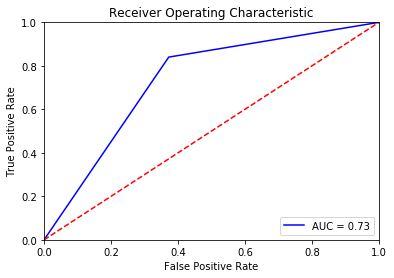

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_NB)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Code(from Scratch)

Decision trees involve the greedy selection of the best split point from the dataset at each step. They work great with the testing dataset used to create them but they are not flexible when it comes to classifying new samples.

Random Forest combines the simplicity of decision trees and flexibility resulting in a vast improvement in accuracy

Steps for Random Forest Algorithm:

1) Create a Bootstarpped Dataset

2) Create Decision Trees using a random subset of features

Steps 1 and 2 combined is known as Bagging.


In [ ]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

![image.png](attachment:image.png)

In [ ]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [ ]:
import random
# Select the best split point for a dataset
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = random.randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [ ]:
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [ ]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)

In [ ]:
# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root

In [ ]:
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [ ]:
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = random.randrange(len(dataset))
        sample.append(dataset[index])
    return sample

In [ ]:
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

In [ ]:
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

In [ ]:
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(X_train[0])-1))

In [ ]:
y_pred_RF=random_forest(X_train, X_test, max_depth, min_size, sample_size, 5, n_features)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

print("Precision:",metrics.precision_score(y_test, y_pred_RF))

print("Recall:",metrics.recall_score(y_test, y_pred_RF))

print("f1-score:",metrics.f1_score(y_test,y_pred_RF))

Accuracy: 0.978
Precision: 0.9847328244274809
Recall: 0.920114122681883
f1-score: 0.9513274336283186


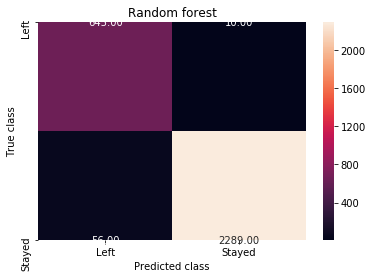

In [ ]:
svc_cm = metrics.confusion_matrix(y_pred_RF, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random forest')
plt.savefig('Random Forest')

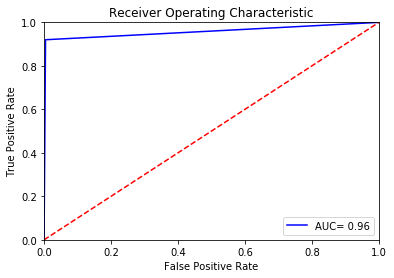

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_RF)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC= %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM

Support Vector Machine is a supervised machine learning algorithm that is used for classification

In simple terms, it is used to classify the data points by using something like a divider called a hyperplane

The main objective of this algorithm is to find a hyperplane that seperates the classes well

there are many possible hyperplanes that could be chosen, our objective is to find a maximum marginal hyperplane

![image.png](attachment:image.png)

Equation of Hyperplane
![image.png](attachment:image.png)

Function of Hyperplane to make predictions of classes
![image.png](attachment:image.png)
The point above or on the hyperplane will be classified as class +1, and the point below the hyperplane will be classified as class -1

Support Vectors 

Support vectors are the data points, which are closest to the hyperplane
These points will define the separating line better by calculating margins. 

Margin

A margin is a gap between the two lines on the closest class points
This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

Hyperplane

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

# Implementation of algorithms using sklearn 

In [42]:
#Reading csv using pandas
import pandas as pd
import numpy as np
hr = pd.read_csv("HR.csv")
column_names = hr.columns.tolist()
#renaming sales column to Department to avoid confusion
hr = hr.rename(columns = { 'sales' : 'Department'})
hr.shape
#reducing categories in Department for better modelling
hr['Department'].unique()
hr['Department']=np.where(hr['Department']=='support','technical',hr['Department'])
hr['Department']=np.where(hr['Department']=='IT','technical',hr['Department'])
#choosing Department and Salary as categorical variables
cat_vars=['Department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1
#expanding all categories in categorical variables
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr_vars=hr.columns.values.tolist()
#allocating class label column for 'y'
y=['left']
#allocating categorical columns to 'X'
X=[i for i in hr_vars if i not in y]
#using RFE package for feature selection to get better accuracy of our models
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'Department_RandD', 'Department_hr', 'Department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']
#splitting training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# SVM (Built-in)

In [43]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for SVM")
print(confusion_matrix(svm_pred,y_test,[1,0]))

Confusion Matrix for SVM
[[ 887  266]
 [ 151 3196]]


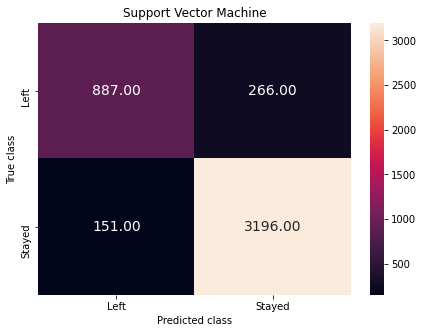

In [44]:
svc_cm = metrics.confusion_matrix(svm_pred, y_test, [1,0])
plt.subplots(figsize=(7,5))
sns.heatmap(svc_cm, annot = True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],annot_kws= {"size" :14})
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))

print("Precision:",metrics.precision_score(y_test, svm_pred))

print("Recall:",metrics.recall_score(y_test, svm_pred))

print("f1-score:",metrics.f1_score(y_test, svm_pred))

Accuracy: 0.9093333333333333
Precision: 0.7739130434782608
Recall: 0.8574181117533719
f1-score: 0.813528336380256


# Logistic Regression (Built-in)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)
logreg_pred = logistic_regression.predict(X_test)
print("Confusion Matrix for Logistic Regression ")
print(confusion_matrix(logreg_pred,y_test,[1,0]))

Confusion Matrix for Logistic Regression 
[[ 273  267]
 [ 765 3195]]


C:\Users\Avinash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


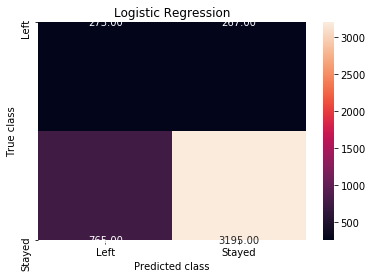

In [ ]:
logreg_cm = metrics.confusion_matrix(logreg_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred))

print("Precision:",metrics.precision_score(y_test, logreg_pred))

print("Recall:",metrics.recall_score(y_test, logreg_pred))

print("f1-score:",metrics.f1_score(y_test,logreg_pred))

Accuracy: 0.7706666666666667
Precision: 0.5055555555555555
Recall: 0.2630057803468208
f1-score: 0.3460076045627376


# Random Forest (Built-in)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rafo_pred = rf.predict(X_test)
print("Confusion Matrix for Random Forest")
print(confusion_matrix(rafo_pred,y_test,[1,0]))

C:\Users\Avinash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix for Random Forest
[[ 991   58]
 [  47 3404]]


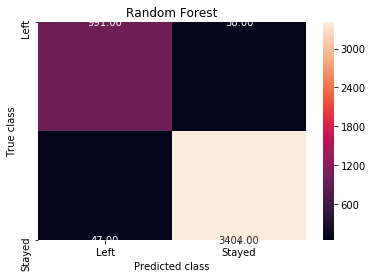

In [ ]:
forest_cm = metrics.confusion_matrix(rafo_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, rafo_pred))

print("Precision:",metrics.precision_score(y_test, rafo_pred))

print("Recall:",metrics.recall_score(y_test, rafo_pred))

print("f1-score:",metrics.f1_score(y_test, rafo_pred))

Accuracy: 0.9766666666666667
Precision: 0.9447092469018112
Recall: 0.9547206165703276
f1-score: 0.9496885481552468


# Naive Bayes(Built-in)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)
predicted = NBmodel.predict(X_test) 
NB_pred = NBmodel.predict(X_test)
print("Confusion Matrix for Naive Bayes")
print(confusion_matrix(NB_pred,y_test,[1,0]))

Confusion Matrix for Naive Bayes
[[ 897 1739]
 [ 141 1723]]


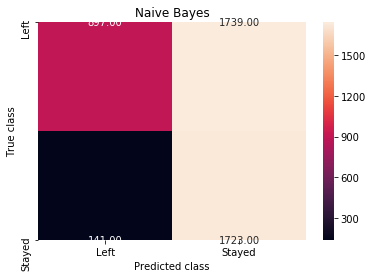

In [ ]:
NB_cm = metrics.confusion_matrix(NB_pred, y_test, [1,0])
sns.heatmap(NB_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Naive Bayes')
plt.savefig('Naive Bayes')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

print("Precision:",metrics.precision_score(y_test, predicted))

print("Recall:",metrics.recall_score(y_test, predicted))

print("f1-score:",metrics.f1_score(y_test, predicted))

Accuracy: 0.5822222222222222
Precision: 0.34028831562974204
Recall: 0.8641618497109826
f1-score: 0.4882961350027218


# KNN (Built-in)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(X_train,y_train)
#Predict Output
KNNpredicted = KNNmodel.predict(X_test) 
print("Confusion Matrix for KNN")
print(confusion_matrix(KNNpredicted,y_test,[1,0]))

Confusion Matrix for KNN
[[ 939  113]
 [  99 3349]]


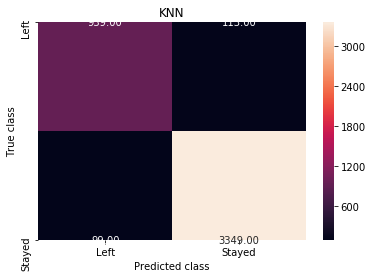

In [ ]:
KNN_cm = metrics.confusion_matrix(KNNpredicted, y_test, [1,0])
sns.heatmap(KNN_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN')
plt.savefig('KNN')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, KNNpredicted))

print("Precision:",metrics.precision_score(y_test, KNNpredicted))

print("Recall:",metrics.recall_score(y_test, KNNpredicted))

print("f1-score:",metrics.f1_score(y_test, KNNpredicted))

Accuracy: 0.9528888888888889
Precision: 0.8925855513307985
Recall: 0.9046242774566474
f1-score: 0.8985645933014355


Analyzing performance of our algorithm using 'ROC' curve

Higher the AOC , Higher the performance

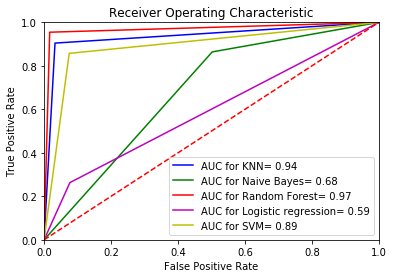

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, KNNpredicted)
roc_auc = metrics.auc(fpr, tpr)
fpr_1, tpr_1, threshold_1 = metrics.roc_curve(y_test, predicted)
roc_auc_1 = metrics.auc(fpr_1, tpr_1)
fpr_2, tpr_2, threshold_2 = metrics.roc_curve(y_test, rafo_pred)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
fpr_3, tpr_3, threshold_3 = metrics.roc_curve(y_test, logreg_pred)
roc_auc_3 = metrics.auc(fpr_3, tpr_3)
fpr_4, tpr_4, threshold_4 = metrics.roc_curve(y_test, svm_pred)
roc_auc_4 = metrics.auc(fpr_4, tpr_4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC for KNN= %0.2f' % roc_auc)
plt.plot(fpr_1, tpr_1, 'g', label = 'AUC for Naive Bayes= %0.2f' % roc_auc_1)
plt.plot(fpr_2, tpr_2, 'r', label = 'AUC for Random Forest= %0.2f' % roc_auc_2)
plt.plot(fpr_3, tpr_3, 'm', label = 'AUC for Logistic regression= %0.2f' % roc_auc_3)
plt.plot(fpr_4, tpr_4, 'y', label = 'AUC for SVM= %0.2f' % roc_auc_4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Through this project, we have used several different Machine Learning algorithms for classification and even though the Random Forest had the highest accuracy but we will select the K-Nearest Neighbour algorithm for this task because not only it is has 2nd best accuracy of the lot but also it was much faster than the Random Forest algorithm 